In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

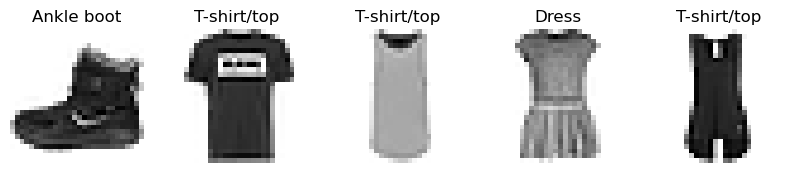

In [13]:
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plot_samples(x_train, y_train, class_names)

In [16]:
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),  
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.Flatten(),  
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')  
])


model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.7073 - loss: 0.7890 - val_accuracy: 0.8566 - val_loss: 0.4004
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8722 - loss: 0.3539 - val_accuracy: 0.8574 - val_loss: 0.3677
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8884 - loss: 0.3094 - val_accuracy: 0.8891 - val_loss: 0.3059
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9032 - loss: 0.2682 - val_accuracy: 0.8902 - val_loss: 0.3050
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9104 - loss: 0.2465 - val_accuracy: 0.8910 - val_loss: 0.3001


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.8910 - loss: 0.3001

Test accuracy: 0.890999972820282


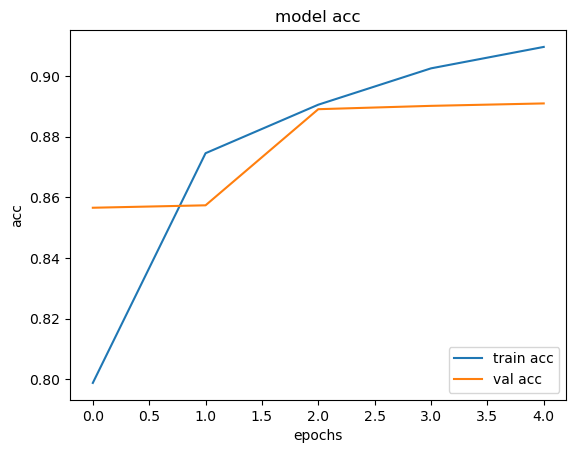

In [20]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.title('model acc')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


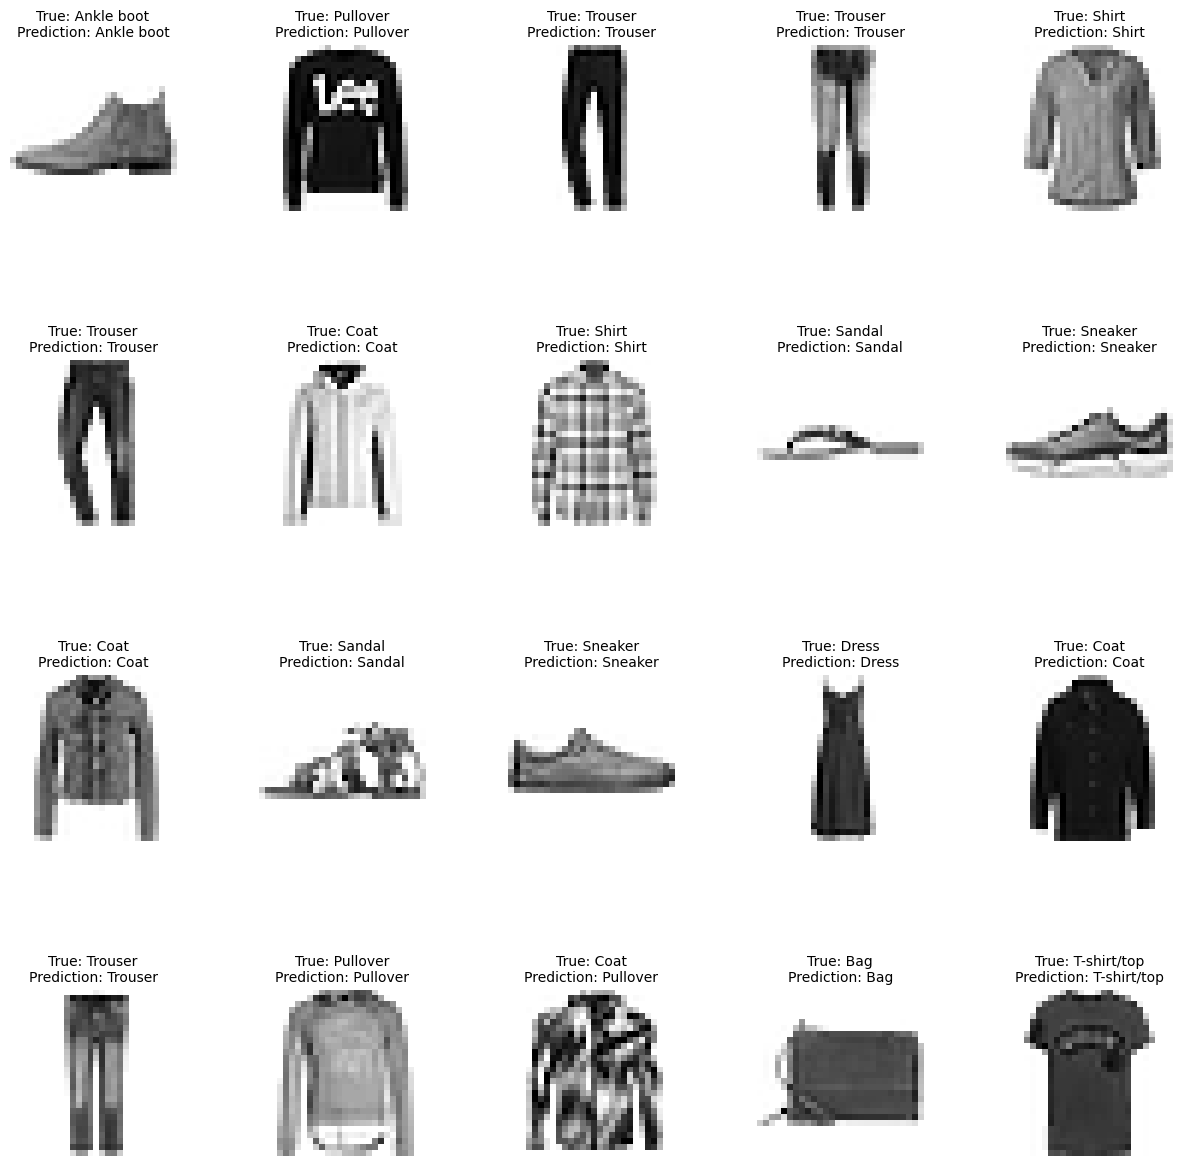

In [32]:
predictions = model.predict(x_test)

num_samples = 20
rows, cols = 4,5
plt.figure(figsize=(15, 15))

for i in range(num_samples):
    plt.subplot(rows, cols, i + 1)  
    plt.imshow(x_test[i], cmap=plt.cm.binary)

    plt.title(f'True: {class_names[y_test[i]]}\nPrediction: {class_names[np.argmax(predictions[i])]}', fontsize=10)
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5) 
plt.show()

Incorrect:  1090


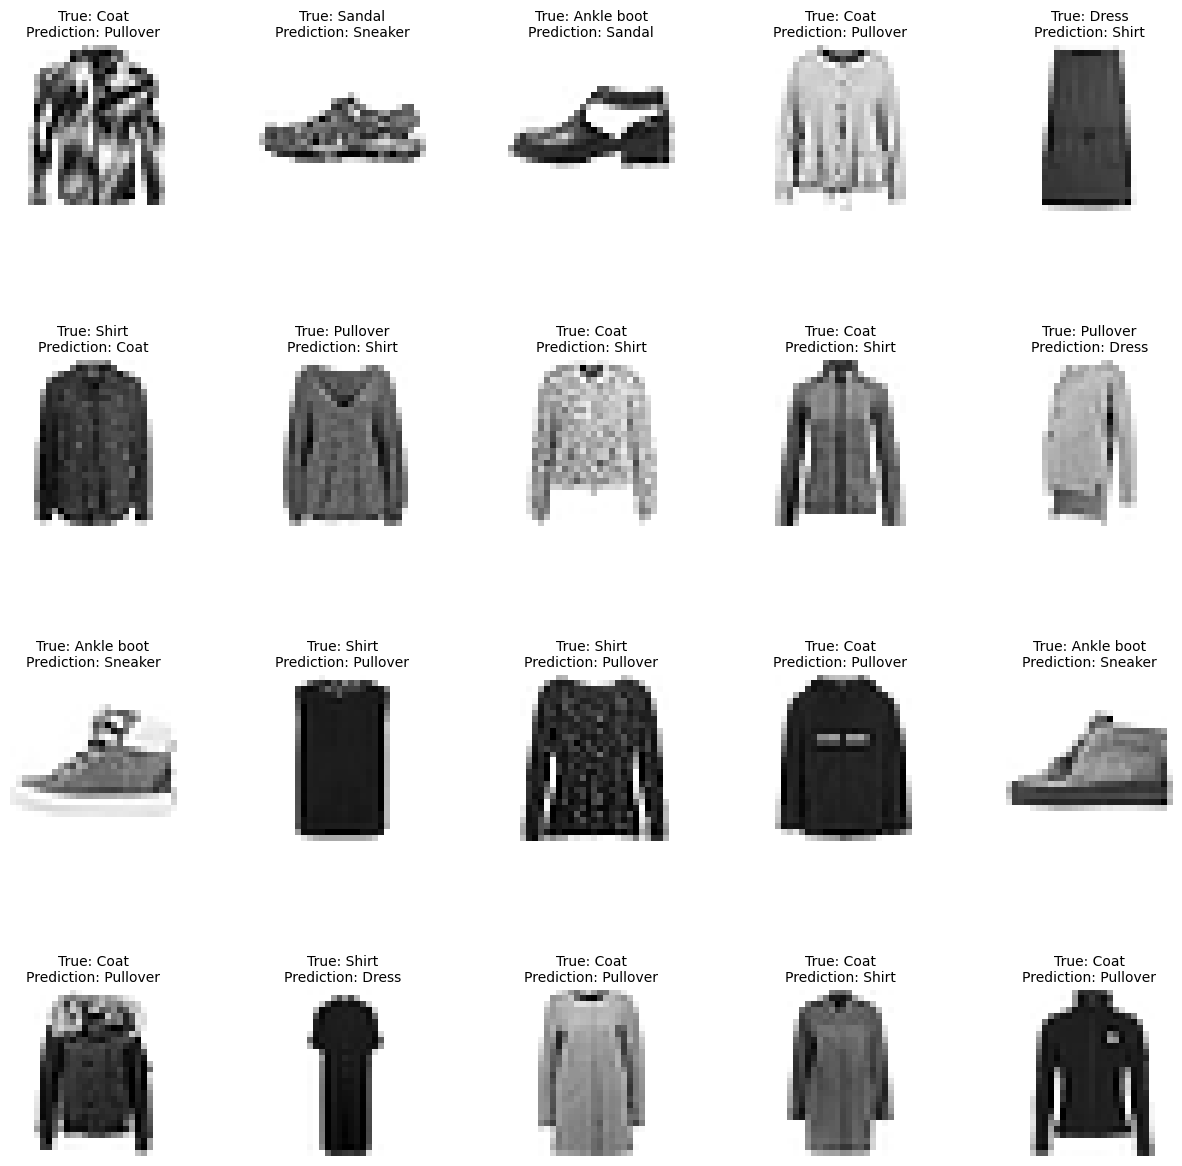

In [34]:
incorrect_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]


num_incorrect = len(incorrect_indices)
print("Incorrect: ", num_incorrect)
num_samples = min(20, num_incorrect)

rows, cols = 4,5 
plt.figure(figsize=(15, 15))

for i in range(num_samples):
    idx = incorrect_indices[i]  
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[np.argmax(predictions[idx])]
    plt.title(f'True: {true_label}\nPrediction: {predicted_label}', fontsize=10)
    
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()